In [1]:
print("Hello world")

Hello world


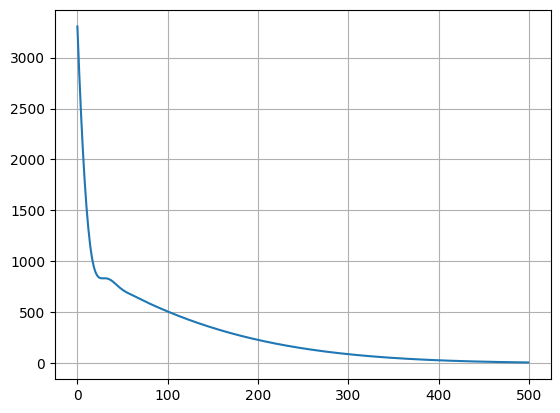

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

model = keras.Sequential()
model.add(Dense(units = 1, input_shape = (1,), activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(0.1))

history = model.fit(c, f, epochs = 500, verbose = 0)

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [11]:
print(model.predict([100]))

1/1 [==============================] - 0s 220ms/step
[[211.31917]]


In [12]:
print(model.get_weights())

[array([[1.823135]], dtype=float32), array([29.005667], dtype=float32)]


In [75]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout

<function matplotlib.pyplot.show(close=None, block=None)>

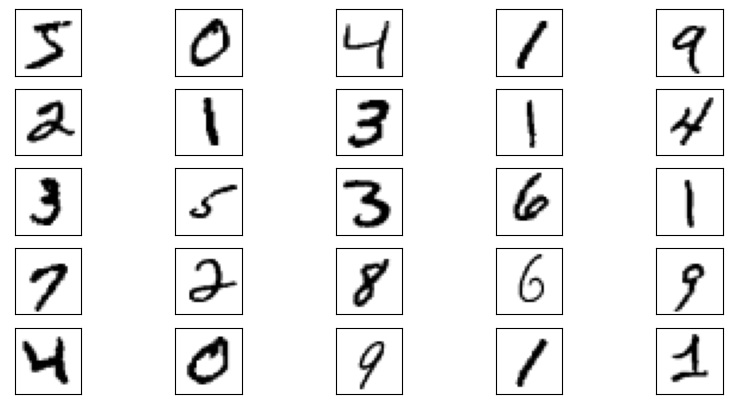

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

size = 5000
x_train_data = x_train [:size]


y_train_data_cat = keras.utils.to_categorical(y_train_data, 10)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

y_train_data = y_train_cat [:size]
plt.figure(figsize = (10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    
plt.show

In [87]:
model = keras.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(300, activation = 'relu'),
    Dropout(0,8),
    Dense(10, activation = 'softmax')
])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [92]:
his = model.fit(x_train_data,y_train_data_cat,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 2s 8ms/step - loss: 0.6451 - accuracy: 0.8270 - val_loss: 0.3549 - val_accuracy: 0.9010
Epoch 2/50
125/125 [==============================] - 1s 7ms/step - loss: 0.2502 - accuracy: 0.9320 - val_loss: 0.2995 - val_accuracy: 0.9230
Epoch 3/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1747 - accuracy: 0.9538 - val_loss: 0.2743 - val_accuracy: 0.9260
Epoch 4/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1240 - accuracy: 0.9682 - val_loss: 0.2492 - val_accuracy: 0.9350
Epoch 5/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0895 - accuracy: 0.9805 - val_loss: 0.2408 - val_accuracy: 0.9340
Epoch 6/50
125/125 [==============================] - 1s 10ms/step - loss: 0.0672 - accuracy: 0.9860 - val_loss: 0.2390 - val_accuracy: 0.9380
Epoch 7/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0456 - accuracy: 0.9933 - val_loss: 0.2430 - val_accuracy: 0.9360
Epoch

In [93]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.9445


[0.27577918767929077, 0.9445000290870667]

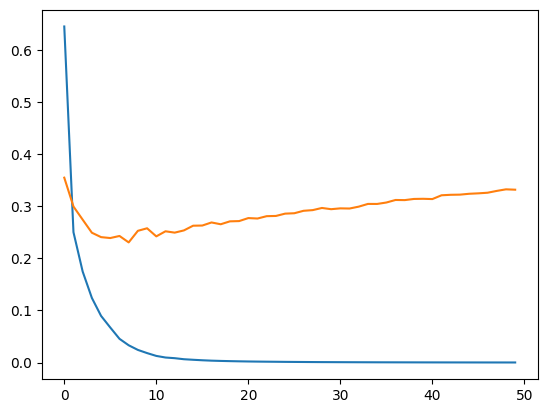

In [94]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

1/1 [==============================] - 0s 84ms/step
[[8.1855536e-09 2.1319241e-08 1.6602660e-07 9.8582896e-05 1.0260618e-03
  5.4143424e-05 6.0303179e-10 7.6615230e-05 9.4970439e-08 9.9874425e-01]]
Распознная цирфа: 9


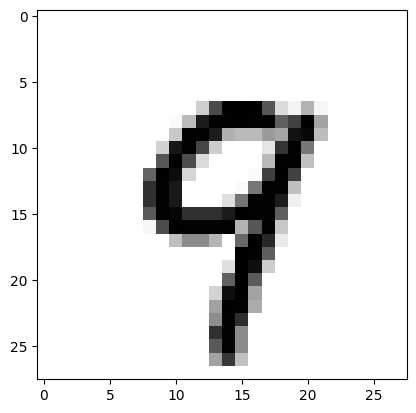

In [59]:
n = 12
x = np.expand_dims(x_test[n], axis = 0)
res = model.predict(x)
print(res)
print(f"Распознная цирфа: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [61]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [62]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(273, 28, 28)


Значения сети: 5


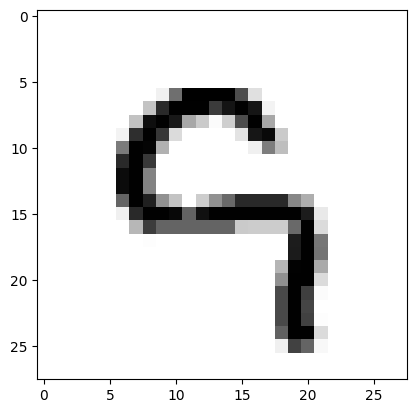

Значения сети: 8


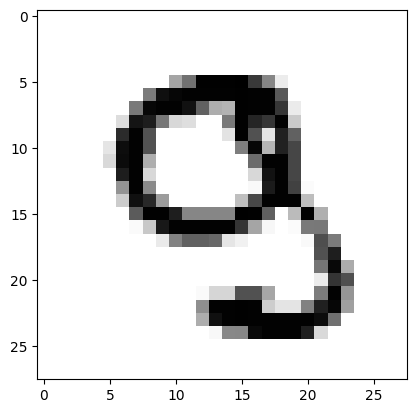

Значения сети: 8


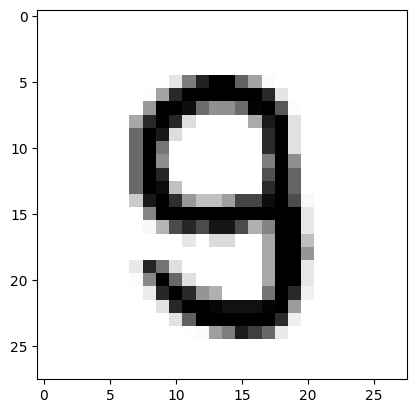

Значения сети: 6


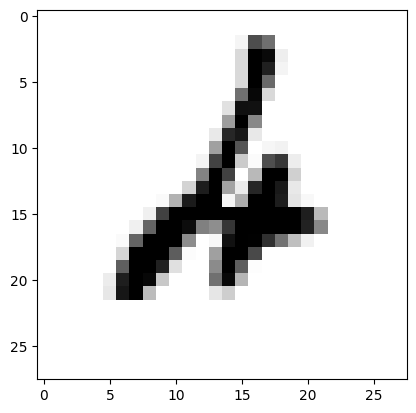

Значения сети: 0


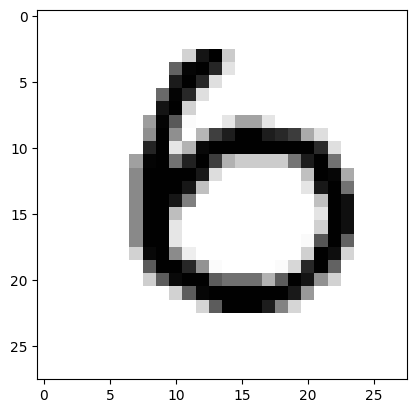

In [63]:
for i in range(5):
    print ("Значения сети: " + str(y_false[i]))
    plt.imshow(x_false[i], cmap = plt.cm.binary)
    plt.show()